# Case Study on Testing of Hypothesis

A company started to invest in digital marketing as a new way of their product promotions.The company wishes to clarify whether there is any increase in sales after stepping into digital marketing. Also the company needs to check whether there is any dependency between the features “Region” and “Manager”.For that they collected data and stored it in Sales_add.csv file.

In [45]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
## Load sales data from Add_sales_data_2018.csv file to data set salesdata
salesdata=pd.read_csv("D:\python\CaseStudy4\Sales_add.csv")
## Show first five rows in the data set
salesdata.head(5)

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [3]:
## Display the shape - total number of rows and columns in the sales_add data set
salesdata.shape

(22, 5)

In [4]:
## Display the columns header and data type specifications etc-This will give the information about the sales_add data set. ie. column name, its counts and data type respectively
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [5]:
## Check null values if any
salesdata.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

No Null Values present in the given sales data set

In [6]:
## Calculating the statistical data of the numerical values of the sales_add data set
salesdata.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


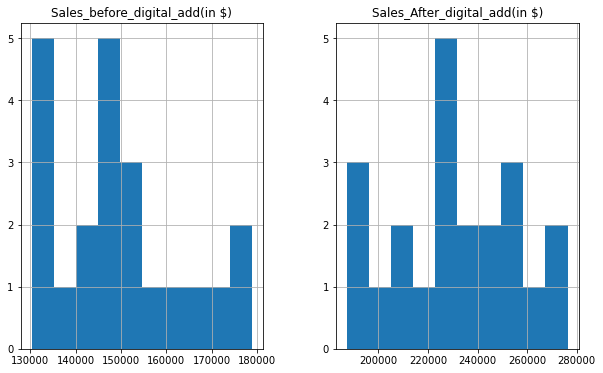

In [13]:
## Histogram visualization of the sales dataset
freqgraph = salesdata.select_dtypes(include=['int64'])
freqgraph.hist(figsize=(10,6))
plt.show()

Text(0.5, 1.02, 'Sales data by region')

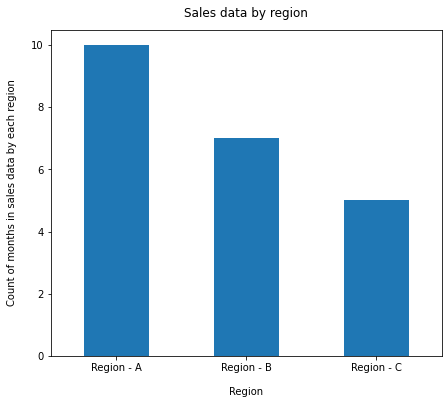

In [8]:
salesdata['Region'].value_counts().plot(kind='bar',figsize=(7,6),rot=0)
plt.xlabel("Region",labelpad=14)
plt.ylabel("Count of months in sales data by each region",labelpad=14)
plt.title("Sales data by region",y=1.02)

In this sales data set we have 3 regions. Region A - The most sales data available available. that is 10 months, Region B - 7 months, Region C- 5 months 

## Check whether there is any increase in sales after stepping into digital marketing.

Region
Region - A    AxesSubplot(0.125,0.125;0.775x0.755)
Region - B    AxesSubplot(0.125,0.125;0.775x0.755)
Region - C    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

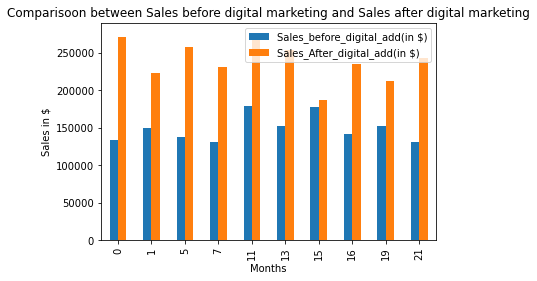

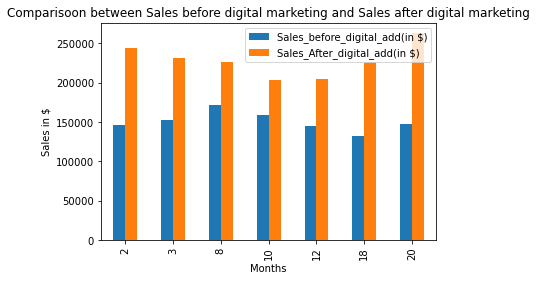

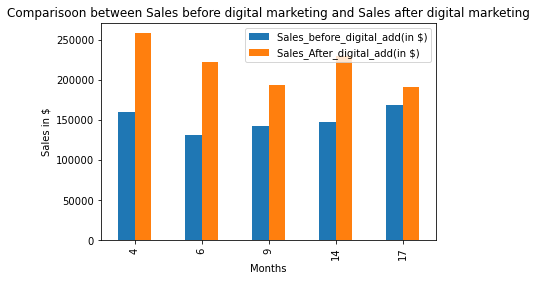

In [12]:
salesdata.groupby('Region')[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']].plot(kind='bar',figsize=(6,4),title="Comparisoon between Sales before digital marketing and Sales after digital marketing by Region",xlabel="Months",ylabel="Sales in $")

The bar graph shows the comparison between Comparisoon between Sales before digital marketing and Sales after digital marketing by region wise. We can spot the increase in sales after investing some amount in digital marketing and advertisement.

Suppose we want to know whether a certain plan/program significantly impacts the performance. To test this,compare the difference between the mean sales before and after stepping into digital marketing, we use a paired samples t-test because for each month their sales before stepping into digital marketing can be paired with their sales after stepping into digital marketing 

The two hypotheses for testing whether the investment in digital marketing will helps the company to increase the sales or not by a t-test are as follows:

H0: The mean sales before digital marketing and sales after digital marketing are equal
    
HA: Th mean sales before digital marketing and sales after digital marketing are not equal

In [14]:
import scipy.stats as stats

In [17]:
## Perform the following steps to conduct a paired samples t-test in Python. We’ll use the ttest_rel() function from the scipy.stats library to conduct a paired samples t-test, which uses the following syntax:
## ttest_rel(a, b)
## where:
## •	a: an array of sample observations from group 1
## •	b: an array of sample observations from group 2
stats.ttest_rel(salesdata["Sales_After_digital_add(in $)"],salesdata["Sales_before_digital_add(in $)"])


Ttest_relResult(statistic=12.09070525287017, pvalue=6.336667004575778e-11)

Since the p-value (6.336667004575778e-11 -This scientific notation shows that the p value is too small) is less than 0.05, we reject the null hypothesis. We have sufficient evidence to say that the true mean sales value is different for sales before and after stepping into digital marketing.

## Check whether there is any dependency between the features “Region” and “Manager

A chi-square test is used in statistics to test the independence of two events/features.
Steps to perform
1.Define Hypothesis.

2.Build a Contingency table.

3.Find the expected values.

4.Calculate the Chi-Square statistic.

5.Accept or Reject the Null Hypothesis.

Text(0.5, 1.02, 'Sales data by Manager')

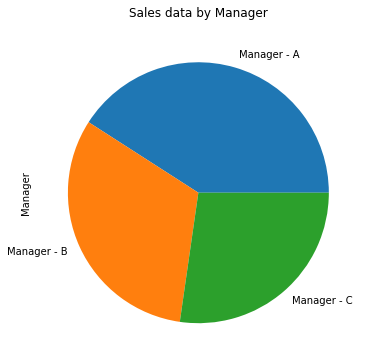

In [21]:
salesdata['Manager'].value_counts().plot(kind='pie',figsize=(7,6),rot=0)
plt.title("Sales data by Manager",y=1.02)

1.Define Hypothesis

Null Hypothesis (H0): 'Region' and 'Manager' are independent.

Alternate Hypothesis (H1): 'Region' and 'Manager' are not independent.

2. Contigency Table - The table was called a contingency table, by Karl Pearson, because the intent is to help determine whether one variable is contingent upon or depends upon the other variable.

In [61]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [62]:
#create contingency table
tb=pd.crosstab(index=salesdata['Region'],columns=salesdata['Manager'])
tb

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [63]:
## add margins to contingency table
ct=pd.crosstab(index=salesdata['Region'], columns=salesdata['Manager'], margins=True)
ct

Manager,Manager - A,Manager - B,Manager - C,All
Region,,,,
Region - A,4,3,3,10
Region - B,4,1,2,7
Region - C,1,3,1,5
All,9,7,6,22


In [64]:
print(tb)
stat, p, dof, expected = chi2_contingency(tb)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')

Manager     Manager - A  Manager - B  Manager - C
Region                                           
Region - A            4            3            3
Region - B            4            1            2
Region - C            1            3            1
dof=4
[[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]
probability=0.950, critical=9.488, stat=3.051
Independent (fail to reject H0)
significance=0.050, p=0.549
Independent (fail to reject H0)


We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:
If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

The critical value is calculated and interpreted, finding that indeed the variables 'Region' and 'Manager' are independent (fail to reject H0). The interpretation of the p-value makes the same finding.